In [18]:
import numpy as np
import pandas as pd
import os
import subprocess, pickle
from matplotlib import pyplot as plt

In [52]:
#### load feven's pilot data
os.chdir('/Users/jyeon/Documents/Github/pilot_analysis/')
dataPath = os.path.join(os.getcwd(), 'data/feven/walking_outdoor')
cleanupPath = os.path.join(os.getcwd(), 'code/cleanup.py')

# run cleanup 
command = ["python", cleanupPath, dataPath]
if not os.path.exists(os.path.join(dataPath, 'eyedata.pkl')):
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE)
pupil_data = pickle.load(open(os.path.join(dataPath, 'eyedata.pkl'), 'rb'))

# compute gaze angle
getgazePath = os.path.join(os.getcwd(), 'code/get_gaze.py')
command = ["python", getgazePath, dataPath]
if not os.path.exists(os.path.join(dataPath, 'gaze_angle_relative_to_gravity.csv')):
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE)
gaze_angles = pd.read_csv(os.path.join(dataPath, 'gaze_angle_relative_to_gravity.csv'))
control1_outdoorwalking = {'pupil_data': pupil_data, 'gaze_angles': gaze_angles}

#### load feven's indoor walking data
dataPath = os.path.join(os.getcwd(), 'data/feven/walking_indoor')

# run cleanup 
command = ["python", cleanupPath, dataPath]
if not os.path.exists(os.path.join(dataPath, 'eyedata.pkl')):
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE)
pupil_data = pickle.load(open(os.path.join(dataPath, 'eyedata.pkl'), 'rb'))

# compute gaze angle
command = ["python", getgazePath, dataPath]
if not os.path.exists(os.path.join(dataPath, 'gaze_angle_relative_to_gravity.csv')):
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE)
gaze_angles = pd.read_csv(os.path.join(dataPath, 'gaze_angle_relative_to_gravity.csv'))

control2_indoorwalking = {'pupil_data': pupil_data, 'gaze_angles': gaze_angles}


In [ ]:
#### load patient participant's data
dataPath = os.path.join(os.getcwd(), 'data/pilot_aug09')

# run cleanup 
command = ["python", cleanupPath, dataPath]
if not os.path.exists(os.path.join(dataPath, 'eyedata.pkl')):
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE)
pupil_data = pickle.load(open(os.path.join(dataPath, 'eyedata.pkl'), 'rb'))

# compute gaze angle
command = ["python", getgazePath, dataPath]
if not os.path.exists(os.path.join(dataPath, 'gaze_angle_relative_to_gravity.csv')):
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE)
gaze_angles = pd.read_csv(os.path.join(dataPath, 'gaze_angle_relative_to_gravity.csv'))


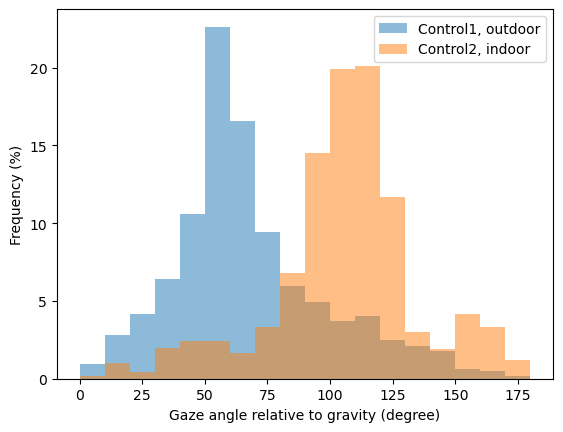

In [60]:
# frequency of gaze_angeles 
num_bins = 18
bin_edges = np.linspace(0,180,num_bins+1)

plt.figure()
hist, _ = np.histogram(control1_outdoorwalking['gaze_angles'], bin_edges)
hist_fraction = (hist/np.sum(hist))*100
plt.bar(bin_edges[:-1], hist_fraction, width=np.diff(bin_edges), align='edge', alpha=.5)

hist, _ = np.histogram(control2_indoorwalking['gaze_angles'], bin_edges)
hist_fraction = (hist/np.sum(hist))*100
plt.bar(bin_edges[:-1], hist_fraction, width=np.diff(bin_edges), align='edge', alpha=.5)

plt.xlabel('Gaze angle relative to gravity (degree)')
plt.ylabel('Frequency (%)')
plt.legend(['Control1, outdoor', 'Control2, indoor'])
plt.show()
